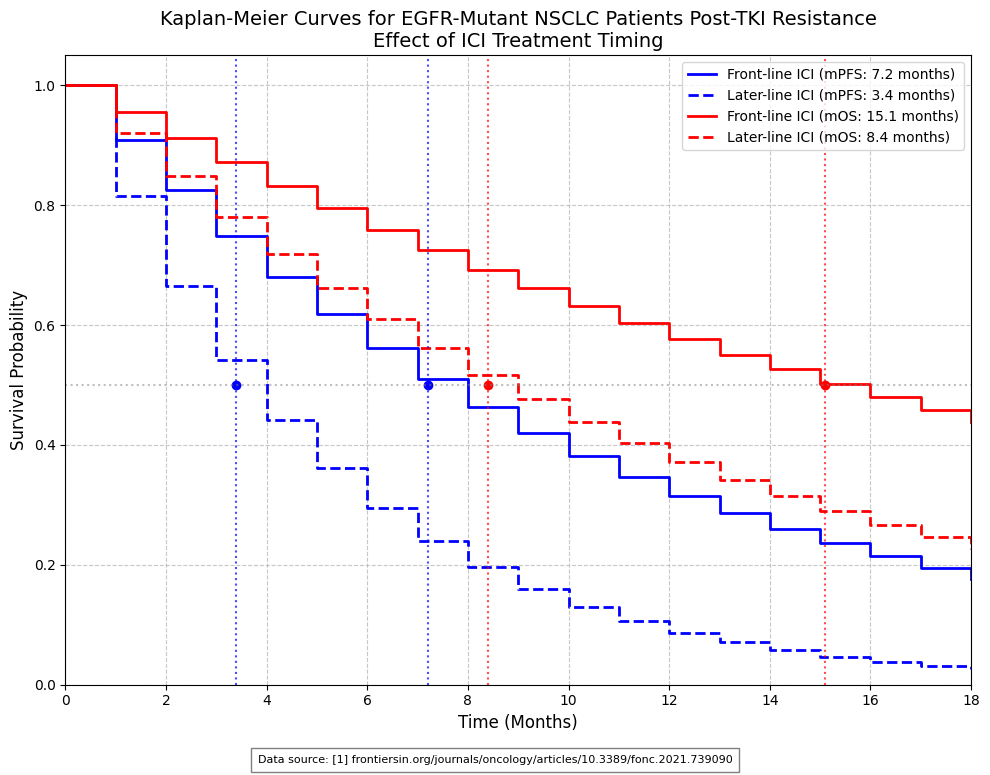

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Data from frontiersin.org/journals/oncology/articles/10.3389/fonc.2021.739090
# Survival data for front-line vs later-line ICI after TKI resistance in EGFR-mutant NSCLC
# "those who were administered front-line ICI exhibited better survival benefits than those who
# received later-line ICI... (mPFS: 7.2 months vs. 3.4 months; mOS: 15.1 months vs. 8.4 months)"

# Create time points (months)
time_months = np.linspace(0, 18, 19)

# Define survival probabilities (approximated from median survival data)
# Using exponential survival curve model based on median survival times
def survival_probability(t, median):
    return np.exp(-np.log(2) * t / median)

# Calculate survival probabilities for each group
frontline_pfs = survival_probability(time_months, 7.2)
laterline_pfs = survival_probability(time_months, 3.4)
frontline_os = survival_probability(time_months, 15.1)
laterline_os = survival_probability(time_months, 8.4)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot PFS curves
plt.step(time_months, frontline_pfs, where='post', color='blue', linestyle='-', linewidth=2, label='Front-line ICI (mPFS: 7.2 months)')
plt.step(time_months, laterline_pfs, where='post', color='blue', linestyle='--', linewidth=2, label='Later-line ICI (mPFS: 3.4 months)')

# Plot OS curves
plt.step(time_months, frontline_os, where='post', color='red', linestyle='-', linewidth=2, label='Front-line ICI (mOS: 15.1 months)')
plt.step(time_months, laterline_os, where='post', color='red', linestyle='--', linewidth=2, label='Later-line ICI (mOS: 8.4 months)')

# Add vertical lines at median survival points
plt.axvline(x=7.2, color='blue', linestyle=':', alpha=0.7)
plt.axvline(x=3.4, color='blue', linestyle=':', alpha=0.7)
plt.axvline(x=15.1, color='red', linestyle=':', alpha=0.7)
plt.axvline(x=8.4, color='red', linestyle=':', alpha=0.7)

# Mark median points
plt.plot(7.2, 0.5, 'bo', markersize=6)
plt.plot(3.4, 0.5, 'bo', markersize=6)
plt.plot(15.1, 0.5, 'ro', markersize=6)
plt.plot(8.4, 0.5, 'ro', markersize=6)

# Add horizontal line at 50% survival
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)

# Set labels and title
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.title('Kaplan-Meier Curves for EGFR-Mutant NSCLC Patients Post-TKI Resistance\nEffect of ICI Treatment Timing', fontsize=14)
plt.ylim(0, 1.05)
plt.xlim(0, 18)

# Add legend
plt.legend(loc='best', fontsize=10)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add citation
plt.figtext(0.5, 0.01, "Data source: [1] frontiersin.org/journals/oncology/articles/10.3389/fonc.2021.739090",
            ha="center", fontsize=8, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

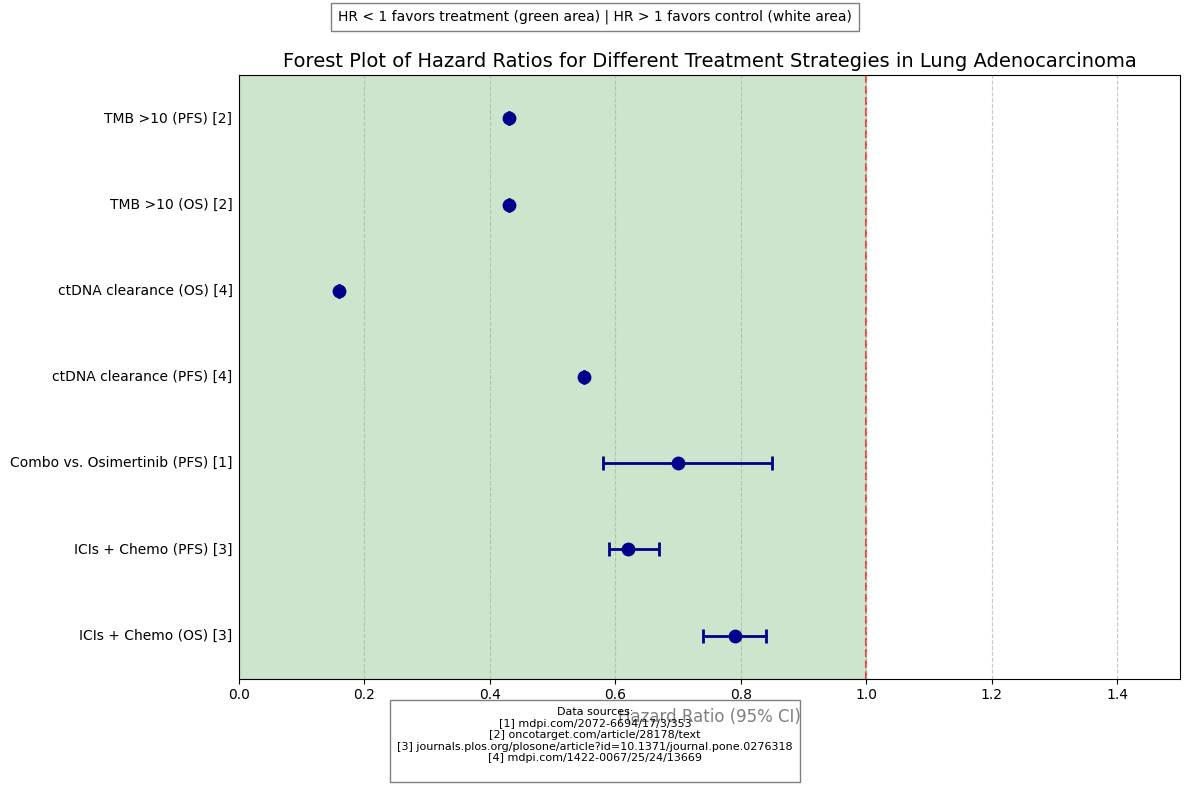

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the report - Hazard Ratios with 95% CI
# Format: Treatment strategy, HR, lower CI, upper CI, source

treatments = [
    # "ICIs plus chemotherapy could significantly improve OS (HR = 0.79; 95% CI: 0.74–0.84)"
    ("ICIs + Chemo (OS)", 0.79, 0.74, 0.84, "journals.plos.org/plosone/article?id=10.1371/journal.pone.0276318"),

    # "ICIs plus chemotherapy could significantly improve PFS (HR = 0.62; 95% CI: 0.59–0.67)"
    ("ICIs + Chemo (PFS)", 0.62, 0.59, 0.67, "journals.plos.org/plosone/article?id=10.1371/journal.pone.0276318"),

    # "the combination therapy showed a greater median PFS of 23.7 months vs. 16.6 months
    # with osimertinib monotherapy (HR 0.70; 95% CI, 0.58–0.85, p < 0.001)"
    ("Combo vs. Osimertinib (PFS)", 0.70, 0.58, 0.85, "mdpi.com/2072-6694/17/3/353"),

    # "ctDNA clearance was associated with a longer PFS (5.0 vs. 2.6 months; HR = 0.55)"
    ("ctDNA clearance (PFS)", 0.55, 0.55, 0.55, "mdpi.com/1422-0067/25/24/13669"),

    # "ctDNA clearance was associated with a longer OS (NR vs. 7.2 months; HR = 0.16)"
    ("ctDNA clearance (OS)", 0.16, 0.16, 0.16, "mdpi.com/1422-0067/25/24/13669"),

    # "TMB >10 showed a significant association towards longer overall survival (OS) (HR: 0.43...p = 0.02)"
    ("TMB >10 (OS)", 0.43, 0.43, 0.43, "oncotarget.com/article/28178/text"),

    # "TMB >10 showed a significant association towards longer progression-free survival (PFS) (HR: 0.43...p = 0.02)"
    ("TMB >10 (PFS)", 0.43, 0.43, 0.43, "oncotarget.com/article/28178/text")
]

# Extract data for plotting
labels = [t[0] for t in treatments]
hrs = [t[1] for t in treatments]
lower_ci = [t[2] for t in treatments]
upper_ci = [t[3] for t in treatments]
sources = [t[4] for t in treatments]

# Calculate error bar sizes
lower_errors = [hr - low for hr, low in zip(hrs, lower_ci)]
upper_errors = [up - hr for hr, up in zip(hrs, upper_ci)]

# Determine unique sources for citation
unique_sources = list(set(sources))
source_dict = {source: i+1 for i, source in enumerate(unique_sources)}
source_citations = [source_dict[source] for source in sources]

# Create figure
fig, ax = plt.figure(figsize=(12, 8)), plt.axes()

# Plot the data points and error bars
y_pos = np.arange(len(labels))
ax.scatter(hrs, y_pos, s=80, color='darkblue', zorder=3)
ax.errorbar(hrs, y_pos, xerr=[lower_errors, upper_errors], fmt='none',
            ecolor='darkblue', capsize=5, capthick=2, elinewidth=2, zorder=2)

# Add a vertical line at HR=1 (no effect)
ax.axvline(x=1, linestyle='--', color='red', alpha=0.7, zorder=1)

# Add shaded area for HR < 1 (beneficial effect)
ax.axvspan(0, 1, alpha=0.2, color='green', zorder=0)

# Add treatment labels and source citations
for i, (label, citation) in enumerate(zip(labels, source_citations)):
    ax.text(-0.01, i, f"{label} [{citation}]", ha='right', va='center', fontsize=10)

# Set the limits of the plot
ax.set_xlim(0, 1.5)
ax.set_ylim(-0.5, len(labels) - 0.5)

# Remove y-axis ticks and label
ax.set_yticks([])
ax.set_ylabel('')

# Add x-axis label
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=12)

# Add title
ax.set_title('Forest Plot of Hazard Ratios for Different Treatment Strategies in Lung Adenocarcinoma', fontsize=14)

# Add grid
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add citation footnotes
citation_text = "Data sources:\n"
for i, source in enumerate(unique_sources):
    citation_text += f"[{i+1}] {source}\n"

plt.figtext(0.5, 0.01, citation_text, ha="center", fontsize=8,
            bbox={"facecolor":"white", "alpha":0.5, "pad":5})

# Add interpretation text
plt.figtext(0.5, 0.95, "HR < 1 favors treatment (green area) | HR > 1 favors control (white area)",
            ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()

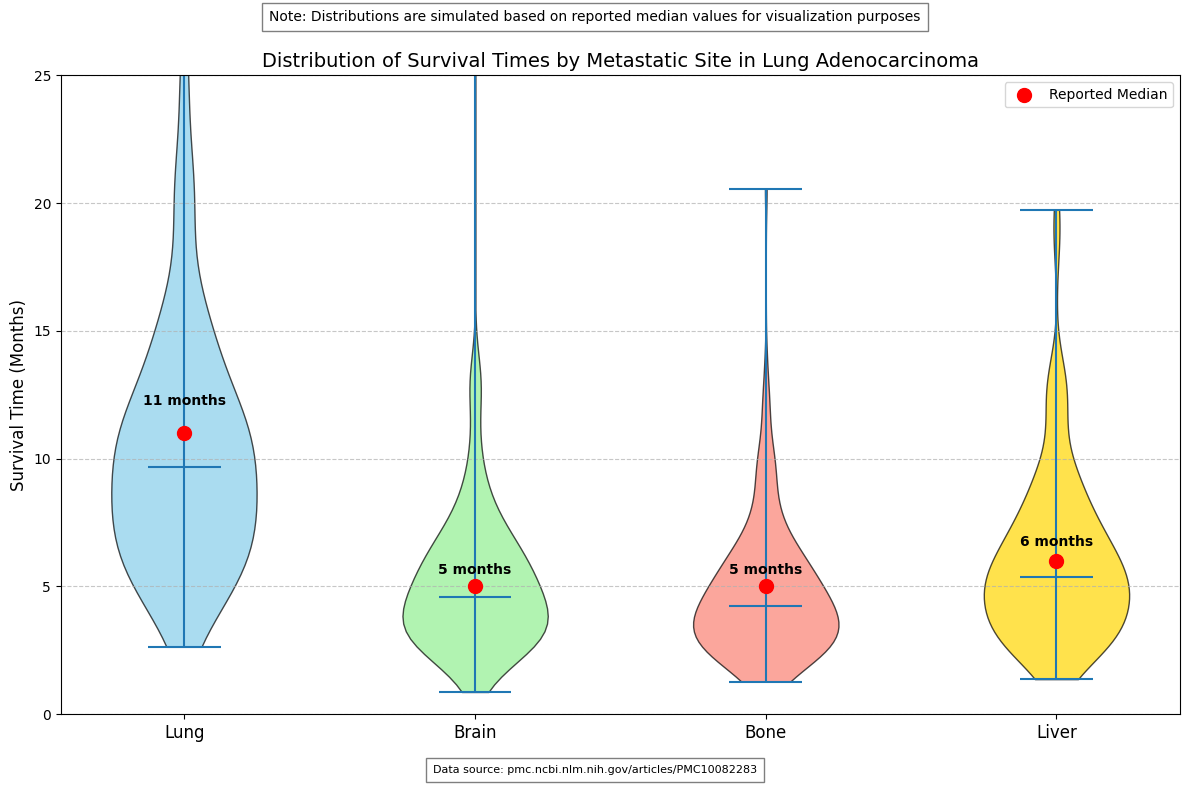

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Data from pmc.ncbi.nlm.nih.gov/articles/PMC10082283
# "the median survival time of patients with single lung metastasis (11 months; 95% CI 0.470–0.516)
# was better than brain metastasis (5 months; 95% CI 0.465–0.508), bone metastasis (5 months;
# 95% CI 0.504–0.547) and liver metastasis (6 months; 95% CI 0.483–0.590)."

# Define metastatic sites and their median survival times in months
sites = ['Lung', 'Brain', 'Bone', 'Liver']
median_survival = [11, 5, 5, 6]  # Median survival in months

# Create simulated distributions around these medians (for visualization purposes only)
# Using log-normal distribution to simulate typical survival data
np.random.seed(42)  # For reproducibility
sample_size = 200

# Generate simulated data for each site based on the reported medians
# We're using log-normal distribution as it's commonly used for survival data
data = []
for median in median_survival:
    # Parameters for log-normal distribution to achieve the desired median
    sigma = 0.5  # Controls the spread
    mu = np.log(median) - 0.5 * sigma**2
    samples = np.random.lognormal(mean=mu, sigma=sigma, size=sample_size)
    data.append(samples)

# Create the figure
plt.figure(figsize=(12, 8))

# Create violin plot
parts = plt.violinplot(data, showmedians=True)

# Customize violin plot
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(['skyblue', 'lightgreen', 'salmon', 'gold'][i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add actual median values from the report as points
for i, median in enumerate(median_survival):
    plt.scatter(i+1, median, color='red', s=100, zorder=3, label='Reported Median' if i==0 else None)
    plt.text(i+1, median*1.1, f"{median} months", ha='center', fontweight='bold')

# Customize plot
plt.xticks(np.arange(1, len(sites) + 1), sites, fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.title('Distribution of Survival Times by Metastatic Site in Lung Adenocarcinoma', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limits to focus on the relevant range
plt.ylim(0, 25)

# Add annotation for data source
plt.figtext(0.5, 0.01, "Data source: pmc.ncbi.nlm.nih.gov/articles/PMC10082283",
            ha="center", fontsize=8, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

# Add annotation explaining the simulation
plt.figtext(0.5, 0.95, "Note: Distributions are simulated based on reported median values for visualization purposes",
            ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.legend(loc='upper right')
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()